In [1]:
from data_generator import ssp_data
import pickle
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = open('data_pickle', 'rb')
ssp_obj = pickle.load(file)
file.close()

In [3]:
df = ssp_obj.x.drop(columns=['time', 'lat', 'lon'])
y = ssp_obj.test_data.y.numpy()
df

,tas,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,tas_9,tas_10,...,tas_30,tas_31,tas_32,tas_33,tas_34,tas_35,tas_36,tas_37,tas_38,tas_39
0,284.528320,282.464142,284.291168,283.132751,284.651947,284.831085,284.705200,283.982544,283.209351,283.406494,...,281.811829,281.371918,283.208984,284.216949,286.015350,283.668304,284.809875,283.668304,284.835632,284.809875
1,287.539368,280.244568,284.054016,285.201050,285.553284,284.454803,284.374817,284.695038,283.901184,282.244171,...,282.837433,282.395935,282.835175,287.725464,286.617950,283.943146,284.162109,283.943146,285.790070,284.162109
2,284.881317,280.398346,284.130188,283.143311,282.487152,282.092773,282.171570,284.966370,284.325806,280.334778,...,280.508759,280.181793,281.891022,284.751038,284.893921,283.891754,282.453857,283.891754,287.167877,282.453857
3,281.906555,276.135284,278.999359,278.682312,277.991150,278.428497,278.910461,286.105103,285.555634,279.939911,...,276.122742,278.386505,277.180573,279.325195,280.907806,279.808960,278.433167,279.808960,288.571198,278.433167
4,279.067780,274.095276,276.211304,275.564301,276.290802,276.003906,275.955292,287.014404,286.544556,278.296539,...,272.721802,275.065002,274.005920,276.936218,279.518860,277.367950,275.130280,277.367950,289.716766,275.130280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163795,295.138611,295.646790,297.660187,296.686462,295.769592,295.989685,296.137421,295.953644,295.793396,296.672424,...,297.207520,296.141510,296.076263,296.818420,295.533142,294.159027,296.367096,294.159027,296.985901,296.367096
163796,294.829285,295.332123,297.565948,296.689148,295.513763,295.840149,296.017670,296.145081,295.949310,296.478699,...,296.929565,295.970123,296.137695,296.979309,295.515900,294.085693,296.406189,294.085693,297.174591,296.406189
163797,295.266998,296.204254,297.976593,297.217041,295.990906,296.283142,296.494812,296.421753,296.190033,296.905853,...,297.659912,296.652222,296.756897,297.968018,296.026703,294.279358,296.925720,294.279358,297.382996,296.925720
163798,295.787415,296.935608,298.933594,298.348389,296.734222,297.134613,297.408020,296.794220,296.540497,297.311462,...,298.514954,297.787598,297.787720,300.189636,296.724030,295.586273,297.436218,295.586273,297.640442,297.436218


In [4]:
clf = linear_model.Lasso(alpha=1)
clf.fit(df, y)
clf.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [5]:
clf.score(df, y)

0.9748346198589205

In [6]:
clf.coef_

array([ 2.2681835e-01,  0.0000000e+00,  3.2630682e-02,  1.3406523e-01,
        0.0000000e+00,  6.2640771e-02,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.3335998e-02,  6.6193432e-02,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  1.3770649e-01, -0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  2.1436214e-02,  0.0000000e+00,  0.0000000e+00,
        1.0726998e-01,  0.0000000e+00,  0.0000000e+00,  1.0726140e-01,
        0.0000000e+00,  0.0000000e+00,  5.3013619e-06], dtype=float32)

In [7]:
score = []
params = pd.DataFrame(columns=range(1,40))
alphas = np.arange(0, 10, 0.1)
for alpha in alphas:
    print(alpha)
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(df, y)
    params.loc[alpha] = clf.coef_
    score.append(clf.score(df, y))

0.0


C:\Users\jqcla\AppData\Local\Temp\ipykernel_2880\3015553986.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit(df, y)
c:\Users\jqcla\anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


c:\Users\jqcla\anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.218e+04, tolerance: 4.894e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1000000000000005
4.2
4.3
4.4
4.5
4.6000000000000005
4.7
4.800000000000001
4.9
5.0
5.1000000000000005
5.2
5.300000000000001
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.9
6.0
6.1000000000000005
6.2
6.300000000000001
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.0
7.1000000000000005
7.2
7.300000000000001
7.4
7.5
7.6000000000000005
7.7
7.800000000000001
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.700000000000001
8.8
8.9
9.0
9.1
9.200000000000001
9.3
9.4
9.5
9.600000000000001
9.700000000000001
9.8
9.9


In [8]:
file = open("model_names.txt", "r") 
data = file.read() 
data_into_list = data.split("\n")
file.close() 
names = data_into_list
names.pop(0)
names

['ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'CAMS-CSM1-0',
 'CanESM5 p1',
 'CanESM5 p2',
 'CanESM5-CanOE p2',
 'CESM2',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CNRM-CM6-1 f2',
 'CNRM-CM6-1-HR f2',
 'CNRM-ESM2-1 f2',
 'EC-Earth3',
 'EC-Earth3-Veg',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G p1',
 'GISS-E2-1-G p3',
 'HadGEM3-GC31-LL f3',
 'HadGEM3-GC31-MM f3',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'MCM-UA-1-0',
 'MIROC6',
 'MIROC-ES2L f2',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'UKESM1-0-LL f2']

In [9]:
params.columns = names
params

,ACCESS-ESM1-5,AWI-CM-1-1-MR,BCC-CSM2-MR,CAMS-CSM1-0,CanESM5 p1,CanESM5 p2,CanESM5-CanOE p2,CESM2,CESM2-WACCM,CIESM,...,MCM-UA-1-0,MIROC6,MIROC-ES2L f2,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,UKESM1-0-LL f2
0.0,0.277904,0.000239,0.051114,0.097655,-0.013611,0.057985,0.00209,-0.007461,0.001443,0.063461,...,0.076427,0.061266,-0.007116,0.057009,0.015083,0.063716,0.113096,-0.11354,0.01006,0.102204
0.1,0.305703,0.000000,0.046143,0.089475,0.000000,0.065509,0.00000,-0.000000,-0.000000,0.009198,...,0.076590,0.034825,0.000000,0.077565,0.000000,-0.000000,0.144578,-0.00000,0.00000,0.000011
0.2,0.309216,0.000000,0.036325,0.079879,0.000000,0.057290,0.00000,-0.000000,-0.000000,0.000000,...,0.050024,0.017064,0.000000,0.089969,0.000000,-0.000000,0.108544,-0.00000,0.00000,0.000005
0.3,0.299212,0.000000,0.035311,0.083244,0.000000,0.058371,0.00000,-0.000000,0.000000,0.000000,...,0.039787,0.006890,0.000000,0.099313,0.000000,-0.000000,0.105149,-0.00000,0.00000,0.000005
0.4,0.289182,0.000000,0.035406,0.090079,0.000000,0.058840,0.00000,-0.000000,0.000000,0.000000,...,0.039208,0.000000,0.000000,0.103552,0.000000,0.000000,0.106395,0.00000,0.00000,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.000000,0.000000,0.000000,0.374192,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
9.6,0.000000,0.000000,0.000000,0.373355,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
9.7,0.000000,0.000000,0.000000,0.372523,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
9.8,0.000000,0.000000,0.000000,0.371691,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000


In [10]:
params.loc[1]

ACCESS-ESM1-5         0.226818
AWI-CM-1-1-MR         0.000000
BCC-CSM2-MR           0.032631
CAMS-CSM1-0           0.134065
CanESM5 p1            0.000000
CanESM5 p2            0.062641
CanESM5-CanOE p2      0.000000
CESM2                 0.000000
CESM2-WACCM           0.000000
CIESM                 0.000000
CMCC-CM2-SR5          0.000000
CNRM-CM6-1 f2         0.000000
CNRM-CM6-1-HR f2      0.000000
CNRM-ESM2-1 f2        0.000000
EC-Earth3             0.000000
EC-Earth3-Veg         0.000000
FGOALS-f3-L           0.000000
FGOALS-g3             0.000000
FIO-ESM-2-0           0.000000
GFDL-CM4              0.000000
GFDL-ESM4             0.013336
GISS-E2-1-G p1        0.066193
GISS-E2-1-G p3        0.000000
HadGEM3-GC31-LL f3    0.000000
HadGEM3-GC31-MM f3    0.000000
INM-CM4-8             0.137706
INM-CM5-0            -0.000000
IPSL-CM6A-LR          0.000000
KACE-1-0-G            0.000000
MCM-UA-1-0            0.021436
MIROC6                0.000000
MIROC-ES2L f2         0.000000
MPI-ESM1

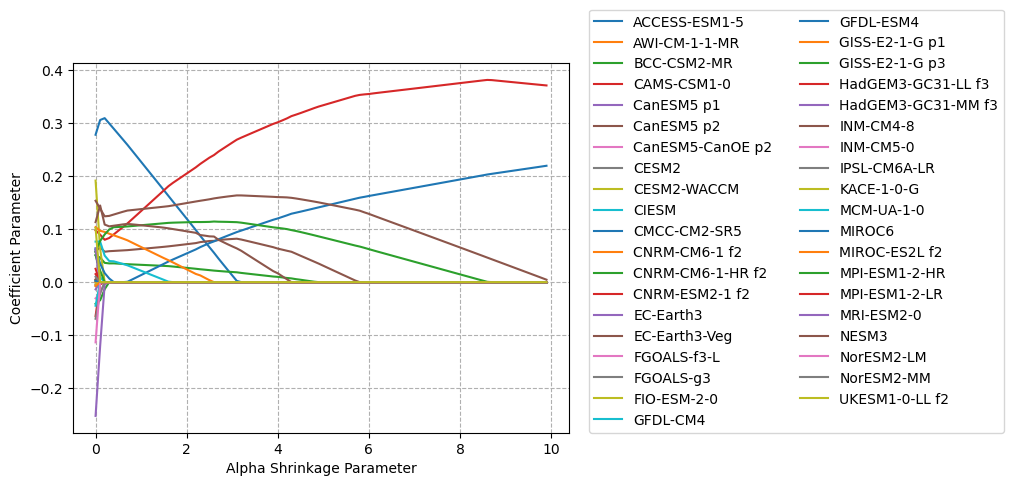

In [11]:
# import seaborn as sns
# sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
params.plot(xlabel='Alpha Shrinkage Parameter', ylabel='Coefficient Parameter', ax=ax)
ax.legend(loc=(1.04, 0), ncol=2)
ax.grid(linestyle='--')
# sns.relplot(data=params, x=params.index, )


In [12]:
score

[0.9827625631833521,
 0.9806122500931477,
 0.9769219684927988,
 0.976330154314124,
 0.9762122095530282,
 0.9760754823007729,
 0.9759083702047949,
 0.9757069289818999,
 0.9754504473589023,
 0.9751597610462808,
 0.9748346198589205,
 0.974475150055971,
 0.974081421852014,
 0.9736534139761567,
 0.9731910785775609,
 0.9726941026951541,
 0.9721618935039331,
 0.9716137453868616,
 0.971039362283981,
 0.970432065607985,
 0.9697919235245825,
 0.9691188008763701,
 0.9684128661504788,
 0.9676599942324033,
 0.966888147724858,
 0.9660820731376554,
 0.9652685085802774,
 0.9644069525012834,
 0.9635384531138156,
 0.9626395604988849,
 0.9617128842492382,
 0.9607566249765586,
 0.9599623008257548,
 0.9591948867022194,
 0.9584040810435211,
 0.95758978510111,
 0.9567521020998012,
 0.9558907672448433,
 0.9550059502368118,
 0.954098065733934,
 0.9531836662907512,
 0.9522306347339687,
 0.9512517073903323,
 0.9502449752084757,
 0.9492857490118786,
 0.9482993080395397,
 0.9472897702466058,
 0.9462576557716746,
 